<a href="https://colab.research.google.com/github/hkbu-kennycheng/comp3065/blob/main/lab6_High_performance_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High-performance machine learning

In [ ]:
import tensorflow as tf
import numpy as np

## The power of GPU

Let's look at a demonstration done by NVIDIA for explaining the different of computation between GPU and CPU in brief.

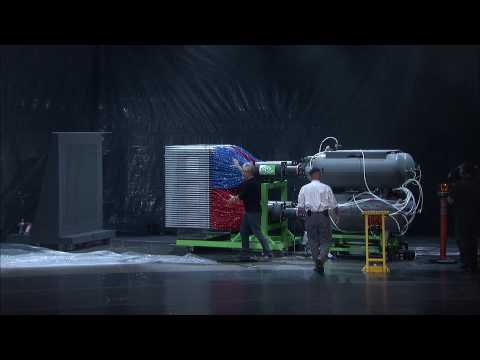

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('-P28LKWTzrI')

# Tensors - a building block of machine learning

Tensor is a `np.arrays` like data structure which is familiar to computation hardware. It's capable for holding multi-dimensional data with a uniform type ([`dtype`](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType)).

## Tensors Basics

### Declaration

In [ ]:
# An int32 scalar contains a single value, and no "axes" (zero dimension).
scalar = tf.constant(4)
print(scalar)

tf.Tensor(4, shape=(), dtype=int32)


In [ ]:
# a float32 tensor with one "axes" (1 dimension).
vector = tf.constant([2.0, 3.0, 4.0])
print(vector)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [ ]:
# a float16 tensor with two "axes" (2 dimensions).
matrix = tf.constant([[1, 2],
                      [3, 4],
                      [5, 6]], dtype=tf.float16)
print(matrix)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


Let's look at the shape of them.


```
                                 shape=(3, 2)
                                _  ,---.---.
shape=()       shape=(3,)       |  | 1 | 2 |
  ,-.        ,---.---.---.      |  )---+---(
  |4|        |2.0|3.0|4.0|      3  | 3 | 4 |
  `-'        `---'---'---'      |  )---+---( 
                                |  | 5 | 6 |
             |-----------|      ^  `---'---'
                   3
                                   |-------|
                                     2
```


And Tensors could have more axes.

In [ ]:
# Tensor could be converted to numpy array
vector.numpy()

array([2., 3., 4.], dtype=float32)

In [ ]:
matrix.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

### Math operations

In [ ]:
a = tf.constant([[1, 2],
                 [3, 4]])
# filling a 2x2 matrix with one.
b = tf.ones([2,2], dtype=tf.dtypes.int32)
print(a)
print(b)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)


In [ ]:
tf.add(a, b) # element-wise addition

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

In [ ]:
tf.multiply(a, b) # element-wise multiplication

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
tf.matmul(a, b) # matrix multiplication

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 3],
       [7, 7]], dtype=int32)>

In [ ]:
a + b # same as `tf.add(a, b)`

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

In [ ]:
a * b # same as `tf.multiply(a, b)`

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
a @ b # same as `tf.matmul(a, b)`

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 3],
       [7, 7]], dtype=int32)>

There much more build-in operations.

In [ ]:
print(tf.reduce_max(a @ b)) # Find the largest value
print(tf.argmax(a @ b)) # Find the index of the largest value
print(tf.nn.softmax(a @ b / 2)) # Compute the softmax

tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor([1 1], shape=(2,), dtype=int64)
tf.Tensor(
[[0.5 0.5]
 [0.5 0.5]], shape=(2, 2), dtype=float64)


### Properties

Tensor properties:

- dtype: data type of items in the tensor
- ndim: number of axes/dimensions
- shape: number of items in each axes/dimensions
- `tf.size` counts total number of items in the tensor


In [ ]:
print(a.dtype)
print(a.ndim)
print(a.shape)
print(tf.size(a).numpy())

<dtype: 'int32'>
2
(2, 2)
4


### Accessing items by index

In [ ]:
# range
print(a[:].numpy())
print(a[:,:].numpy())
print(a[:1,:].numpy())

# index and negative index
print(a[0].numpy())
print(a[-1].numpy())

# single value
print(a[0,-1].numpy())
print(a[0,0].numpy())

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]
[[1 2]]
[1 2]
[3 4]
2
1


### Manipulating Shapes

In [ ]:
print(tf.reshape(a, -1).numpy()) # reduce number of dimension by -1
print(tf.reshape(a, [4, 1]).numpy()) # reshape to particular shape

[1 2 3 4]
[[1]
 [2]
 [3]
 [4]]


## Special Tensors

### Ragged Tensors

### String Tensors

### Sparse tensors

# Tensorflow GPU

## Addional Setup

### ROCm for AMD GPU

In [ ]:
!pip install tensorflow-rocm

### Tensorflow Metal for Apple M1's GPU

In [ ]:
!pip install tensorflow-macos tensorflow-metal

## Connect to local notebook runtime (with GPU support in our lab machine)

# Distributed training with Keras



In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

import os

# Load the TensorBoard notebook extension.
%load_ext tensorboard

## Multi-worker (GPU on multiple machines)

Please work in a pair with your classmate.

### Steup

In [ ]:
import json
import os
import sys

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ.pop('TF_CONFIG', None)

# make sure the current path is in Python's system path
if '.' not in sys.path:
  sys.path.insert(0, '.')

### Create model file

In [ ]:
%%writefile mnist.py

import os
import tensorflow as tf
import numpy as np

def mnist_dataset(batch_size):
  (x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
  # The `x` arrays are in uint8 and have values in the [0, 255] range.
  # You need to convert them to float32 with values in the [0, 1] range.
  x_train = x_train / np.float32(255)
  y_train = y_train.astype(np.int64)
  train_dataset = tf.data.Dataset.from_tensor_slices(
      (x_train, y_train)).shuffle(60000).repeat().batch(batch_size)
  return train_dataset

def build_and_compile_cnn_model():
  model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(28, 28)),
      tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10)
  ])
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
      metrics=['accuracy'])
  return model

### Try with a single worker first

In [ ]:
import mnist

batch_size = 64
single_worker_dataset = mnist.mnist_dataset(batch_size)
single_worker_model = mnist.build_and_compile_cnn_model()
single_worker_model.fit(single_worker_dataset, epochs=3, steps_per_epoch=70)

### Multi-worker configuration

In [ ]:
tf_config = {
    'cluster': {
        'worker': ['REPLACE_WITH_CHIEF_ADDR', 'REPLACE_WITH_WORKER_ADDR']
    },
    'task': {'type': 'worker', 'index': 0}
}